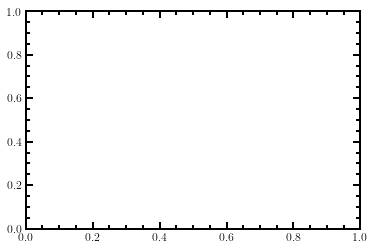

In [31]:

import os
import sys
sys.path.append("/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip")
import yt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py
import constants
from constants import c, M_p, M_3flavor, G, hbar
import spin_flip_tools as sft
import gellmann as gm
import four_current as fc
import matrix
import diagonalizer as dg
import time_plots as tp
import merger_grid as mg
import glob
import concurrent
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,LogLocator)
from matplotlib import cm, colors
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D
from four_current import four_current, read_gradients
from matrix import visualizer
#import latex
from itertools import product


# For ease of development, reload the relevant modules to make sure they are up to date.
import importlib
importlib.reload(constants)
importlib.reload(sft)
importlib.reload(gm)
importlib.reload(fc)
importlib.reload(matrix)
importlib.reload(dg)
importlib.reload(tp)
importlib.reload(mg)

################
# plot options #
################
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)

mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True

mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.grid'] = False




location=[80,73,99]
xmin = 75
xmax = 83
ymin = 67
ymax = 77
zmin = 97
zmax = 99

merger_data_filename = "/mnt/scratch/shared/2-orthonormal_distributions/model_rl0_orthonormal_rotated.h5"
emu_data_loc = "/mnt/scratch/shared/3-Henry_NSM_box/"
emu_filename = emu_data_loc + "i{:03d}".format(location[0])+"_j{:03d}".format(location[1])+"_k{:03d}".format(location[2])+"/allData.h5"
gradient_filename = "/mnt/scratch/shared/4-gradients/gradients_start.h5"
p_abs = 1e7 # eV

f,ax = plt.subplots()

SP = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename = gradient_filename)


[1.30830831 1.33403403 1.33923924 1.34144144 1.34374374 1.34584585
 1.34794795 1.35045045 1.35305305 1.35515516 1.35715716 1.35915916
 1.36336336 1.36616617 1.39059059]
[1.36336336 1.36616617 1.39059059]

max_thetas =  [1.36332585 1.30828231 1.39059858]
computed Omega (only registered if greater than threshold, default is ~0.18) =  [0.99993844665709, 0.9999985120270587, 0.9999992672364192]
individual widths =  [4.722278124091872e-09, 2.407096870715719e-07, 2.0995749450136714e-07]

Total Resonant Width = 4.5538945969703093e-07 Radians


{'resonant_thetas': array([1.36332585, 1.30828231, 1.39059858]),
 'total_width': 4.5538945969703093e-07}

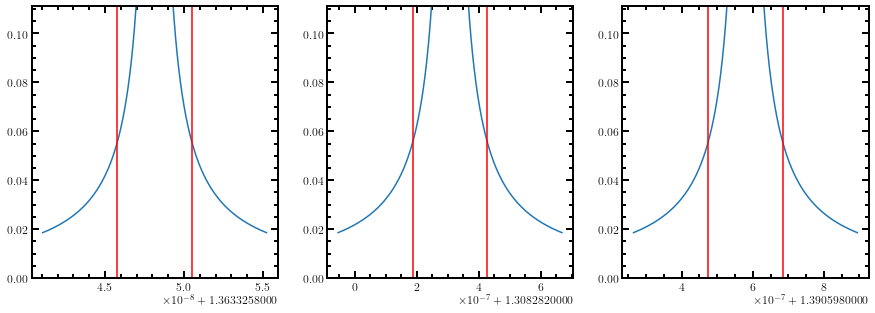

In [33]:
SP.findResonantRegions(theta_resolution = 1000, 
                                            phi_optimal = np.pi,
                                            min_dist_between_peaks = 20,
                                            limits = [1.3, 1.4],
                                            max_peak_count = 3,
                                            method = 'Nelder-Mead',
                                            makeplot = True,
                                            printvalues = True)

In [ ]:
[1.30830831, 1.33403403, 1.33923924, 1.34144144, 1.34374374, 1.34584585,
 1.34794795, 1.35045045, 1.35305305, 1.35515516, 1.35715716, 1.35915916,
 1.36336336, 1.36616617, 1.39059059]

In [6]:
find_res_regions = SP.findResonantRegions(theta_resolution = 1000, 
                                            phi_optimal = np.pi,
                                            min_dist_between_peaks = 5,
                                            limits = [1.3, 1.4],
                                            resonance_threshold = 1/18,
                                            max_peak_count = 6,
                                            method = 'Nelder-Mead',
                                            makeplot = False,
                                            printvalues = True)


max_thetas =  [1.38857308 1.38947398 1.39057509 1.36332585 1.39758209 1.39059858]
computed Omega (only registered if greater than threshold, default is ~0.18) =  [2.8855205068546687e-06, 5.197526306050475e-06, 0.0002488200951544083, 0.999995295299808, 8.37652046832752e-07, 0.9999996293946223]
individual widths =  [4.722278124091872e-09, 2.0995749450136714e-07]

Total Resonant Width = 2.14679772625459e-07 Radians


In [70]:
TP = tp.TimePlots([0,125], emu_filename,  merger_data_filename, location, p_abs)

0.0858537946102404 0.08019012310372023 0.09395608228603937 0.26


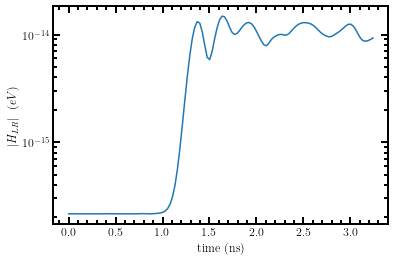

In [72]:
TP.plot( quantity = 'H_LR', avg_method = 'GM', theta=0, phi=0, savefig = 'hlr_time_evolution')

theta_optimal =  1.3905985831395764  along phi =  3.141592653589793  with max_right =  8.54342998448665e-05


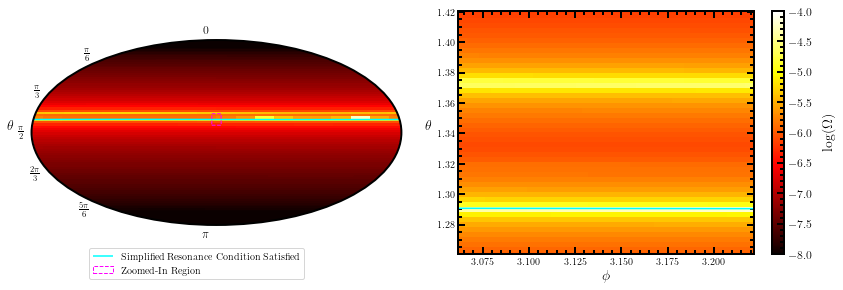

In [51]:
SP.angularEigenvectorPlot(100, 20,
                             value = 'lminusr', # = 'lminusr' or 'rmax'
                             phi_optimal = np.pi, zoom = 0.08, shift = [-0.05,0],
                             vmax = -4,
                             zoom_resolution = 50, initvector = 'default', 
                             method = 'Nelder-Mead', bounds =[(np.pi/4, 3*np.pi/4)], 
                             savefig='angular_resonance_test',  linearPlot = False)

theta_optimal =  1.3905985831395764  along phi =  3.141592653589793  with max_right =  -0.9999395870024789


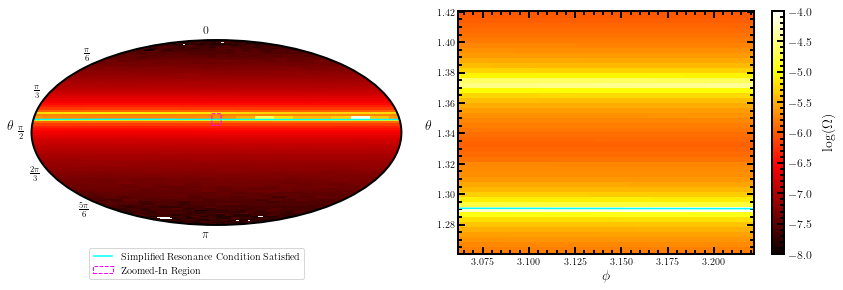

In [25]:
SP.angularEigenvectorPlot(100, 20,
                             value = 'Omega', # = 'lminusr' or 'rmax'
                             phi_optimal = np.pi, zoom = 0.08, shift = [-0.05,0],
                             vmax = -4,
                             zoom_resolution = 50, initvector = 'default', 
                             method = 'Nelder-Mead', bounds =[(np.pi/4, 3*np.pi/4)], 
                             savefig='angular_resonance_test',  linearPlot = False)

array(['1.3905985799211569', '1.308282306683681', '1.3633225176836812'],
      dtype='<U32')

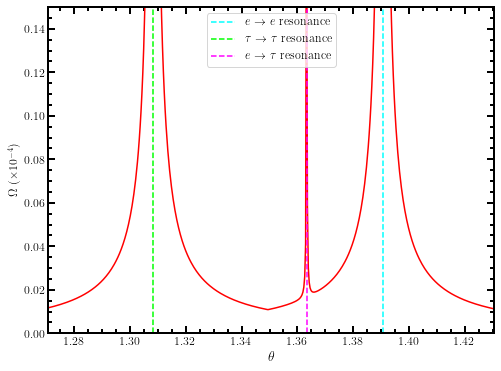

In [52]:
SP.linearEigenvectorPlot(500,  
                              initvector = None, value = 'Omega',
                          zoom = 0.08, shift = -0.04, phi_optimal= np.pi,
                              method = 'Nelder-Mead',
                              vmax = 0.15,
                              extra_lines = None, extra_init_vectors = None,
                              flavor_resonances = [(0,0,'cyan'), (2,2,'lime'), (0,2,'magenta')],
                              savefig = 'linear_eigenvector_plot_init')

#sometimes scipy fails to find the exactly correct theta value for super narrow bands, 
#in which case we can manually input the correct value which can be found by reducing the search bounds (needs to be done manually)
#in this example case, the second and third angles are wrong


array(['1.3905985799211569', '1.308282306683681', '1.3633225176836812'],
      dtype='<U32')

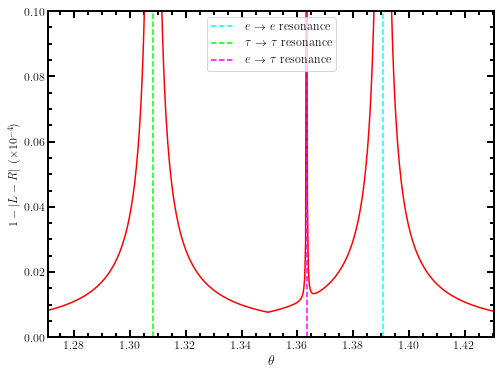

In [20]:
SP.linearEigenvectorPlot(500,  
                              initvector = None, value = 'lminusr',
                              zoom = 0.08, shift = -0.04, phi_optimal= np.pi,
                              method = 'Nelder-Mead',
                              vmax = 0.1,
                              extra_lines = None, extra_init_vectors = None,
                              flavor_resonances = [(0,0,'cyan'), (2,2,'lime'), (0,2,'magenta')],
                              savefig = 'linear_eigenvector_plot_init')

#sometimes scipy fails to find the exactly correct theta value for super narrow bands, 
#in which case we can manually input the correct value which can be found by reducing the search bounds (needs to be done manually)
#in this example case, the second and third angles are wrong


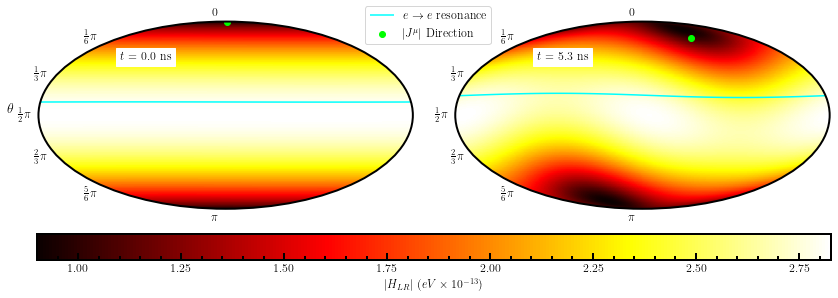

In [13]:
sft.multi_HLR_Plotter( 
                    0, 200,
                    emu_filename,
                    merger_data_filename,
                    location,
                    p_abs,
                    300,
                    300, 
                    resonance_type = 'simplified',
                    savefig='angular_hlr_init',
                    use_gm=True,
                    direction_point=False)

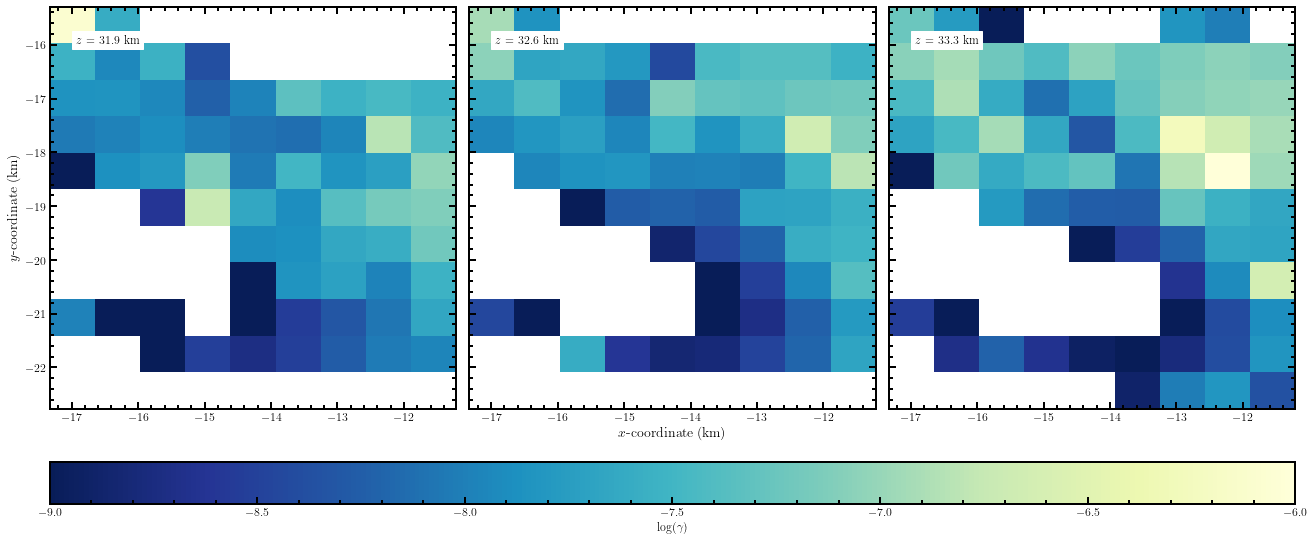

In [119]:
sft.Gradients(gradient_filename, merger_data_filename).plotAdiabaticities([97,98,99],emu_data_loc,p_abs, 1E-9, 1E-6, savefig = 'adiabaticities_init'
                                                                          ,adiabaticities = adiabs)

In [125]:
h5py.File(emu_filename, 'r')['t(s)'][100]

2.635340607906986e-09


max_thetas =  [1.37878439 1.37882439 1.37980449 1.38021453 1.38030454 1.39059858]
computed Omega (only registered if greater than threshold, default is ~0.18) =  [4.944401986311989e-07, 4.960094981519353e-07, 5.411809622447156e-07, 5.628024777180331e-07, 5.676149414402518e-07, 0.9999997125798141]
individual widths =  [4.75111840980702e-08]

Total Resonant Width = 4.75111840980702e-08 Radians


{'resonant_thetas': array([1.37878439, 1.37882439, 1.37980449, 1.38021453, 1.38030454,
        1.39059858]),
 'total_width': 4.75111840980702e-08}

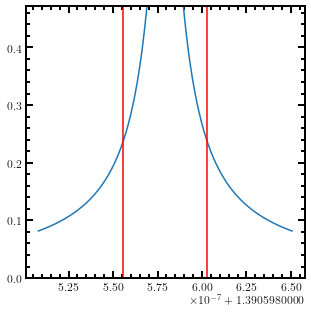

In [12]:
SP.findResonantRegions(theta_resolution = 10000, 
                                            phi_optimal = np.pi,
                                            min_dist_between_peaks = 2,
                                            limits = [1.3, 1.4],
                                            resonance_threshold = 1/(np.sqrt(2)*3),
                                            max_peak_count = 6,
                                            method = 'Nelder-Mead',
                                            makeplot = True,
                                            printvalues = True)


max_thetas =  [1.30828231 1.36332266 1.39059858]
computed Omega (only registered if greater than threshold, default is ~0.18) =  [0.9999998862242632, 0.9999920434135062, 0.9999999388230209]
individual widths =  [3.5973923506738004e-07, 1.150678907713143e-08, 3.6318597662621244e-07]

Total Resonant Width = 7.344320007707239e-07 Radians


KeyError: 'max thetas'

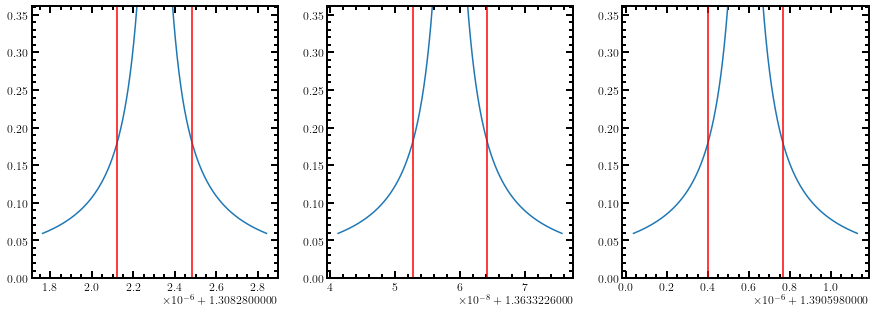

In [53]:
resonant_thetas = SP.findResonantRegions(theta_resolution = 10000, phi_optimal = np.pi,
                       min_dist_between_peaks = 2, limits = [1.3, 1.4],
                                          resonance_threshold = 1 + 1/6 - np.sqrt(1 - (1/6)**2),
                                          max_peak_count = 6,
                                          method = 'Nelder-Mead',
                                          makeplot = True)['max thetas']

np.set_printoptions(precision=8)
resonant_thetas

Optimal theta in Range =  1.30828230664134


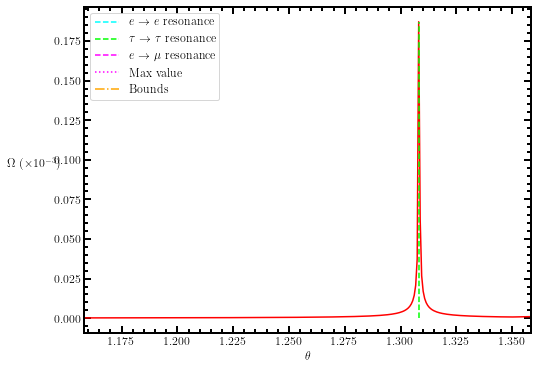

In [20]:
resonant_thetas = SP.linearEigenvectorPlot(300,  
                              initvector = None, value = 'lminusr',
                              zoom = 0.1, shift = -0.05, phi_optimal= np.pi,
                              method = 'Nelder-Mead',
                              extra_lines = None, extra_init_vectors = None,
                              bounds =[(1.305, 1.31)], max_point = True,
                              flavor_resonances = [(0,0,'cyan'), (2,2,'lime'), (0,1,'magenta')],
                              savefig = 'linear_eigenvector_plot_t0')

#sometimes scipy fails to find the exactly correct theta value for super narrow bands, 
#in which case we can manually input the correct value which can be found by reducing the search bounds (needs to be done manually)
#in this example case, the second and third angles are wrong
resonant_thetas = [1.30828231, 1.36332266, 1.39059858]

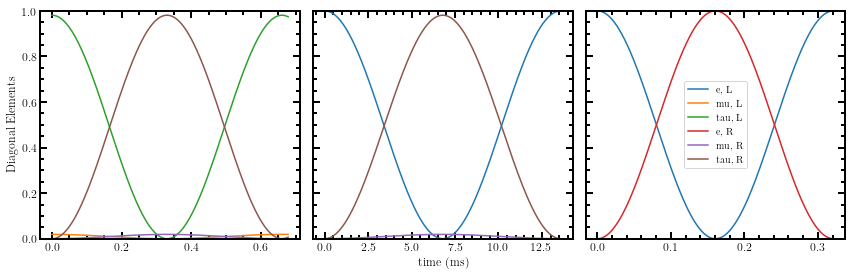

In [54]:
resonant_states = SP.resonant_states(resonant_thetas, P = True)
H_array = np.array([SP.H(float(theta),np.pi) for theta in resonant_thetas])

dg.multi_H_Plotter(H_array, t_lim_array = 'timescale', quantity_array = np.array([0,1,2,3,4,5]),
                    resolution = 500, ylim = None, init_state_array = resonant_states, savefig = 'mutli_H_plotter_init')

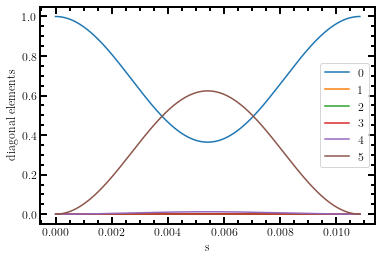

In [27]:
H = SP.H(resonant_thetas[1], np.pi)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = np.diag([1,0,0,0,0,0]), savefig = False)

resonant vector =  [4.31924190e-01-1.08188388e-01j 1.61726187e-05-2.40081671e-07j
 1.00966045e-04-1.38346968e-07j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
resonant vector in energy basis = [3.98691523e-01 1.98263244e-01 1.22028024e-06 5.12268728e-07
 1.23315000e-11 5.14512022e-07]


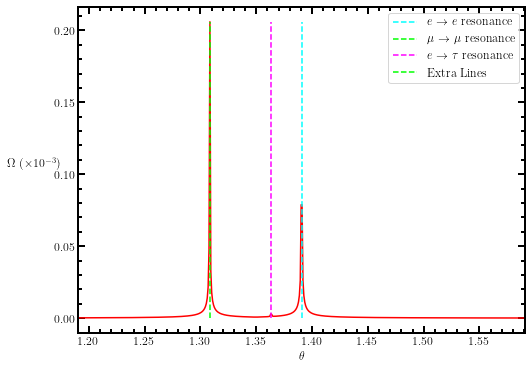

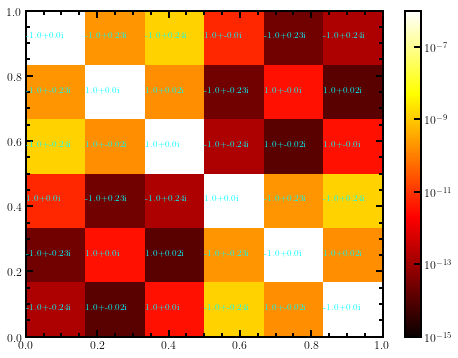

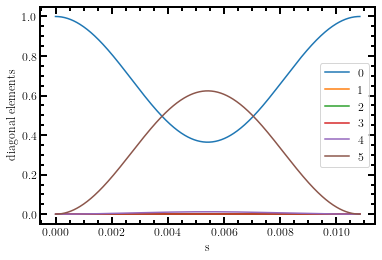

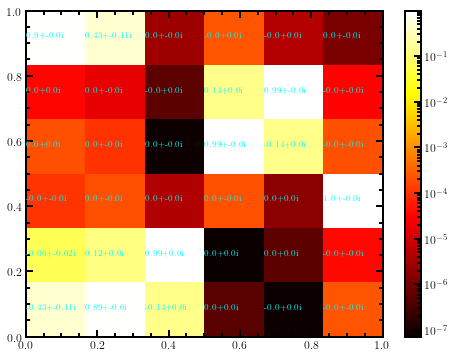

In [35]:
theta = 1.36332266
SP = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified')

H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant vector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(500, value= 'lminusr', shift = 0 , zoom = 0.2, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print('resonant vector in energy basis = '  +str(abs(f_to_e @ ket)))

visualizer(e_to_f, traceless = False, text = 'full')



max_phis =  [0.48396168 4.23857419]
computed adiabaticities (only registered if greater than 1) =  [140013072.99514982, 10500980.47837137]
individual widths =  [9.139429657523124e-09, 6.395934448732987e-09]

Total Adiabatic Width = 1.553536410625611e-08 Radians


1.553536410625611e-08

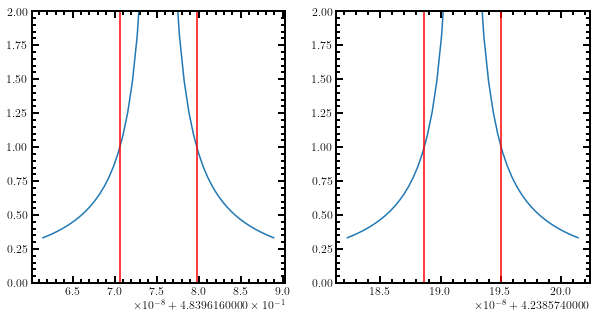

In [7]:
SP.findAdiabaticRegions(phi_resolution = 50, min_dist_between_peaks = 10,
                                          adiabaticity_threshold = 1, max_peak_count = 3,
                                            method = 'Nelder-Mead', makeplot = True)

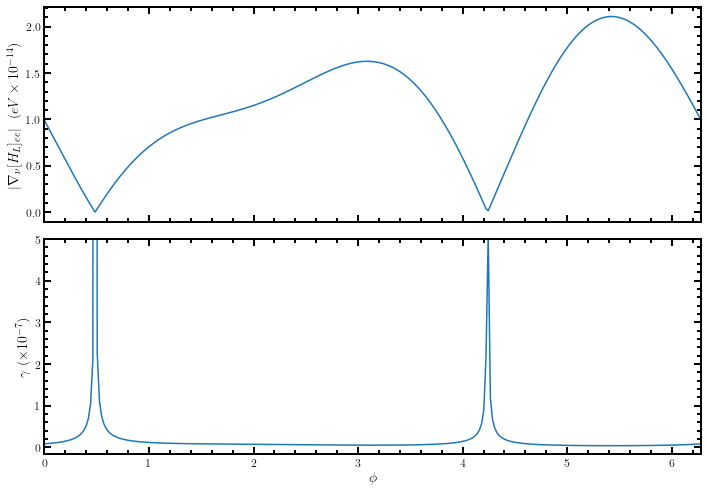

In [187]:
SP.azimuthalGradientsPlot(phi_resolution = 300, adiabaticity_threshold = 1, savefig = 'azimuthal_init', vmax = 5)



In [88]:
SP = sft.SpinParams(100, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified')


['1.3905985792911306' '1.3082823066793952' '1.3633225180165522']


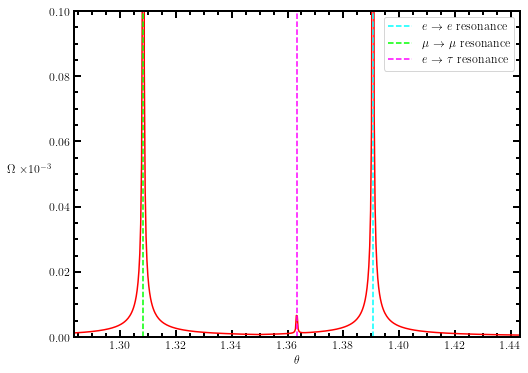

In [41]:
SP = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename = gradient_filename)

thetas = SP.linearEigenvectorPlot(500,  
                              initvector = None, value = 'lminusr',
                              zoom = 0.08, shift = 0.0, phi_optimal= np.pi,
                              method = 'Nelder-Mead', bounds =[(1.36325,1.3634)],
                              extra_lines = None, extra_init_vectors = None,
                              savefig = 'linear_res_init', vmax = 0.1)
print(thetas)


In [21]:
adiabs = sft.Gradients(gradient_filename, merger_data_filename).averageAdiabaticities([97,98,99], emu_data_loc, p_abs, phi_resolution = 2)

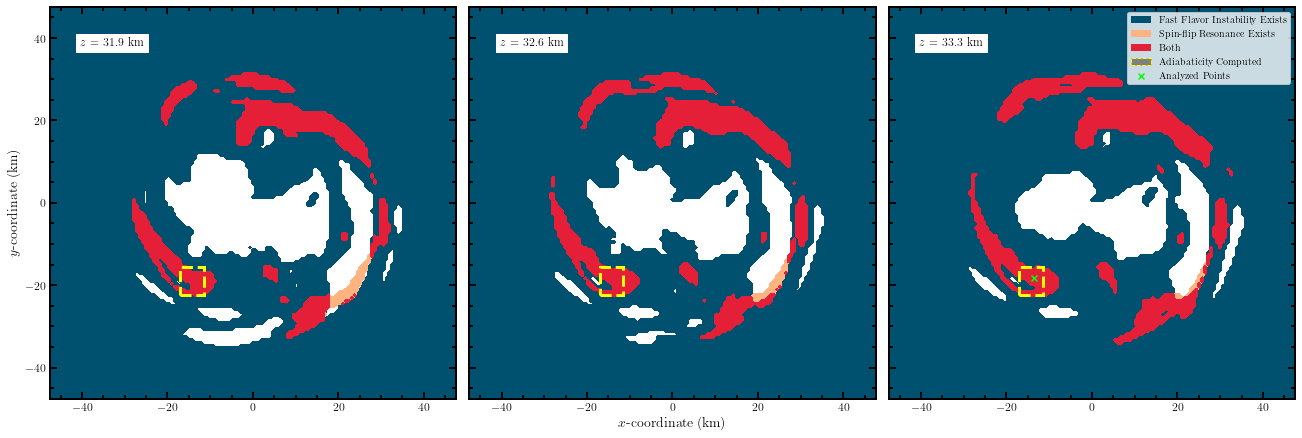

In [9]:
mg.Merger_Grid([97,98,99],
                merger_data_filename,
                  p_abs).contour_plot(x=[None,None,80], y=[None,None,73], 
                                                    rect_xmin = [xmin,xmin,xmin], rect_xmax = [xmax,xmax,xmax],
                                                    rect_ymin = [ymin,ymin,ymin], rect_ymax = [ymax,ymax,ymax],
                                                    savefig = 'conditions_init')

In [ ]:
resonant_thetas = SP_0.linearEigenvectorPlot(300,  
                              initvector = None, value = 'lminusr',
                              zoom = 0.1, shift = -0.05, phi_optimal= np.pi,
                              method = 'Nelder-Mead',
                              extra_lines = None, extra_init_vectors = None,
                              flavor_resonances = [(0,0,'cyan'), (1,1,'lime'), (0,1,'magenta')],
                              savefig = 'linear_eigenvector_plot_t0')


/usr/lib/python3/dist-packages/scipy/optimize/_zeros_py.py:556: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f, a, b, xtol, rtol, maxiter, args, full_output, disp)


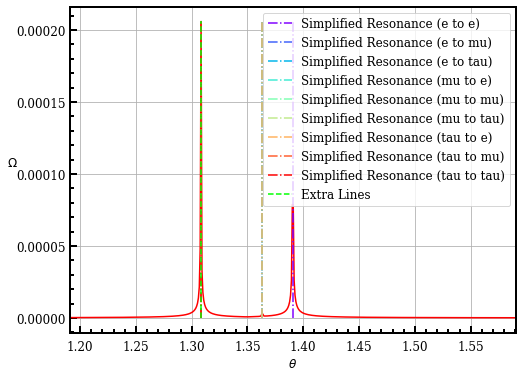

In [48]:
SP.linearEigenvectorPlot(500, value= 'lminusr', shift = 0 , zoom = 0.2, extra_lines=[theta])


resonant vector =  [7.07187934e-01+0.00000000e+00j 2.51712967e-05+5.91503413e-06j
 1.56776303e-04+3.90409647e-05j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]


/usr/lib/python3/dist-packages/scipy/optimize/_zeros_py.py:556: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f, a, b, xtol, rtol, maxiter, args, full_output, disp)


resonant vector in energy basis = [5.00114801e-01 4.99999987e-01 1.93848656e-06 4.04752470e-07
 6.06754114e-12 8.16911227e-07]


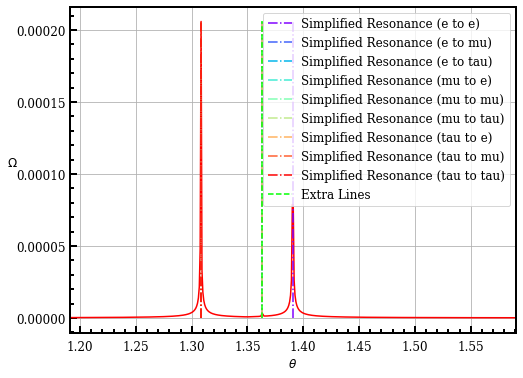

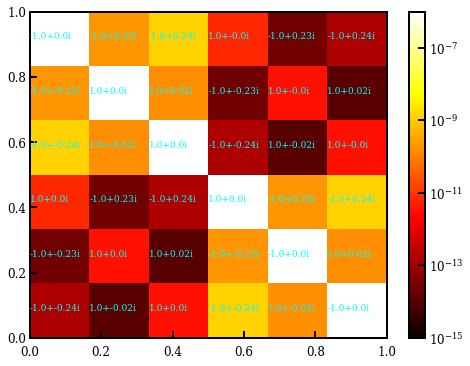

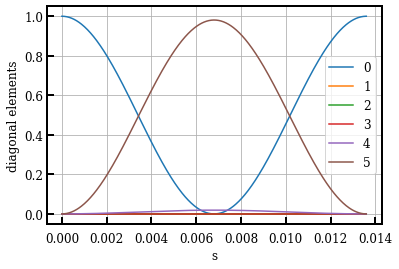

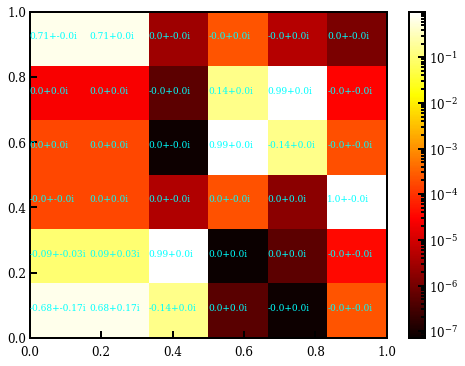

In [45]:

theta = 1.3633226584851739

H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant vector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(500, value= 'lminusr', shift = 0 , zoom = 0.2, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print('resonant vector in energy basis = '  +str(abs(f_to_e @ ket)))

visualizer(e_to_f, traceless = False, text = 'full')


In [44]:

[abs(np.linalg.norm(e_to_f[0:3,n]) - np.linalg.norm(e_to_f[3:6,n]))
                            for n in range(0,6)]


array([[ 9.99999988e-01+1.31812506e-24j,  3.80089447e-07-5.74125480e-10j,
        -1.08859467e-04+2.70214897e-05j,  1.02148589e-04-2.55195136e-05j,
        -2.25430849e-06+2.04274258e-08j,  2.25298832e-06-2.38240535e-08j],
       [ 2.36843303e-05+5.56130181e-06j, -2.82846969e-09-6.60646342e-10j,
         1.00729489e-01+2.01093264e-03j, -9.45805216e-02-1.74526492e-03j,
         7.00440978e-01-2.46148154e-13j, -7.00201630e-01+1.05782632e-03j],
       [ 1.47433828e-04+3.67106778e-05j, -1.76783657e-08-4.38534495e-09j,
         7.22022330e-01+7.16317742e-14j, -6.77926020e-01+1.02384641e-03j,
        -9.77186952e-02+1.95081963e-03j,  9.76823725e-02-2.09772667e-03j],
       [-3.80083811e-07-5.74118142e-10j,  9.99999988e-01+9.21943550e-22j,
         1.02062659e-04-2.52158125e-05j,  1.08634382e-04-2.70135767e-05j,
         2.05630708e-06-1.77449974e-08j,  2.05644159e-06-2.08583302e-08j],
       [ 2.79129386e-09+6.60779965e-10j, -2.33688776e-05-5.56078922e-06j,
         9.45701789e-02+2.03206124

resonant eigenvector =  [-1.62305037e-04+1.44699918e-07j  9.43486076e-02+2.53414533e-02j
  6.79644943e-01+1.68077544e-01j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]


/usr/lib/python3/dist-packages/scipy/optimize/_zeros_py.py:556: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f, a, b, xtol, rtol, maxiter, args, full_output, disp)


Optimal theta in Range =  1.3905985831395764
[8.17368064e-07 4.04311464e-07 2.62173844e-12 1.99163073e-06
 4.99999917e-01 4.99711185e-01]
resonant eigenvector =  [-1.62305037e-04+1.44699918e-07j  9.43486076e-02+2.53414533e-02j
  6.79644943e-01+1.68077544e-01j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]


/usr/lib/python3/dist-packages/scipy/optimize/_zeros_py.py:556: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f, a, b, xtol, rtol, maxiter, args, full_output, disp)


Optimal theta in Range =  1.3905985831395764
[8.17368064e-07 4.04311464e-07 2.62173844e-12 1.99163073e-06
 4.99999917e-01 4.99711185e-01]


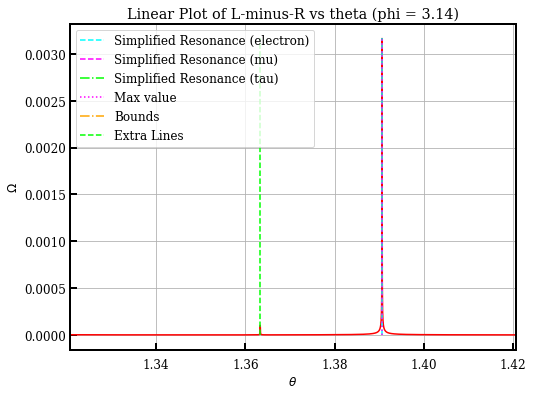

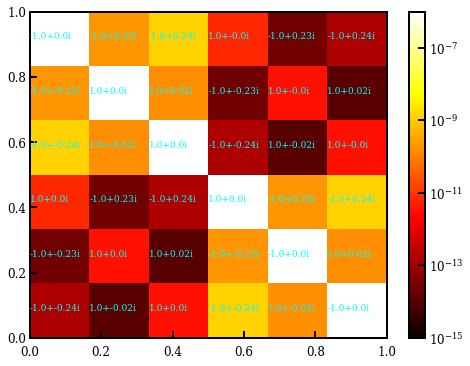

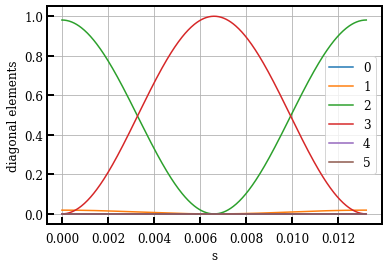

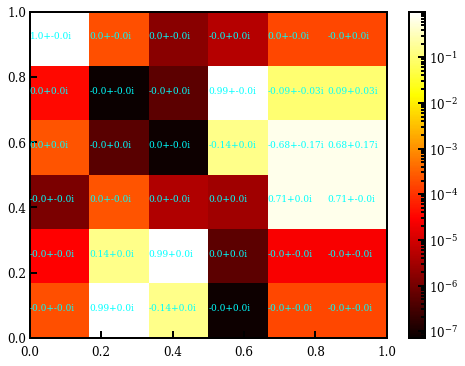

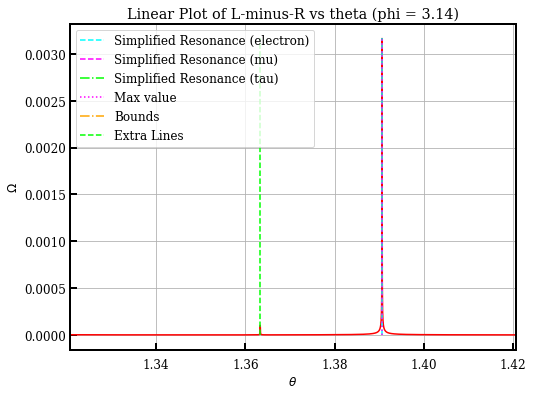

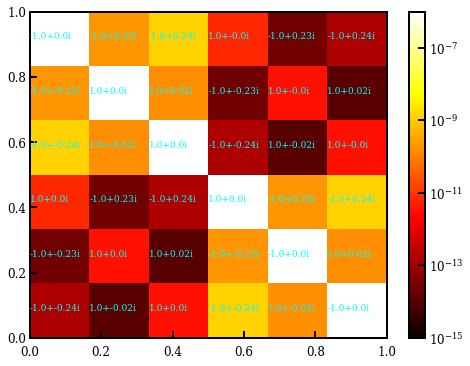

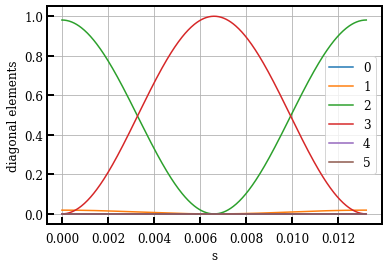

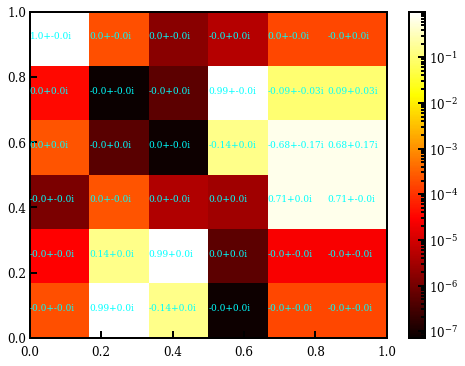

In [214]:

theta = 1.3633276237130167

H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

Optimal theta in Range =  1.3905985831395764


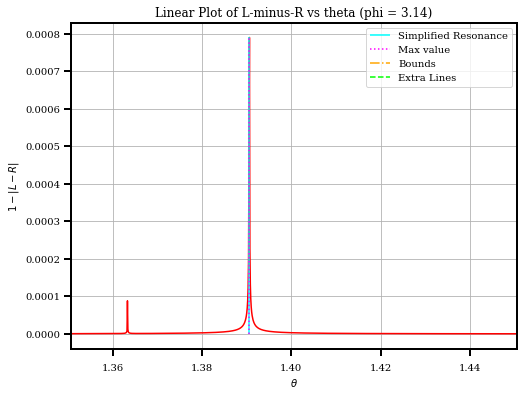

In [3]:
SP.linearEigenvectorPlot(1000, value= 'lminusr', shift = 0.01 , zoom = 0.05, extra_lines=[1.32789143])

In [4]:
thetas = [1.3278914263678416, 1.3687312226369976, 1.3626584354939926,1.3405648106839507,1.346779154993594,1.3561967313513164]



resonant eigenvector =  [ 1.12807798e-06-1.68170097e-09j -2.35710148e-07-5.51379319e-08j
 -1.47531848e-06-3.65983565e-07j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
Optimal theta in Range =  1.3905985831395764
[1.12772611e-06 3.64167081e-12 1.53914504e-06 3.06134470e-08
 8.08243273e-13 1.73755568e-14]


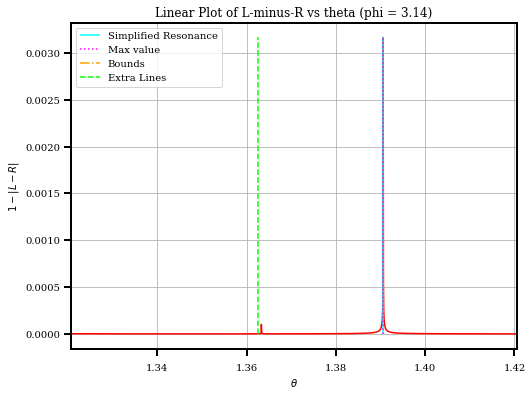

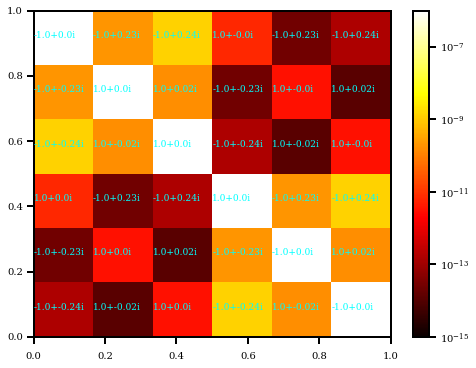

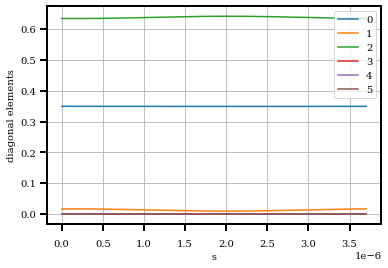

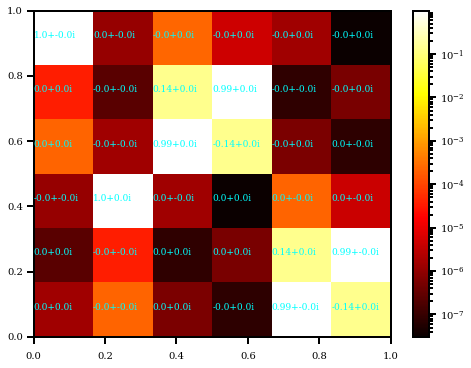

In [5]:

theta = thetas[2]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

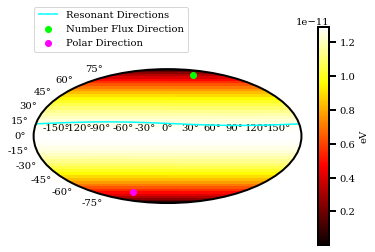

In [28]:
SP.angularPlot(50,50,)

resonant eigenvector =  [-0.04452512-0.0226661j   0.45634882-0.09446325j  0.37749348+0.37115251j
  0.        +0.j          0.        +0.j          0.        +0.j        ]
Optimal theta in Range =  1.3686943579909632
[5.15372775e-08 2.96647713e-06 6.27821441e-08 2.96035033e-06
 4.99929304e-01 4.99999995e-01]


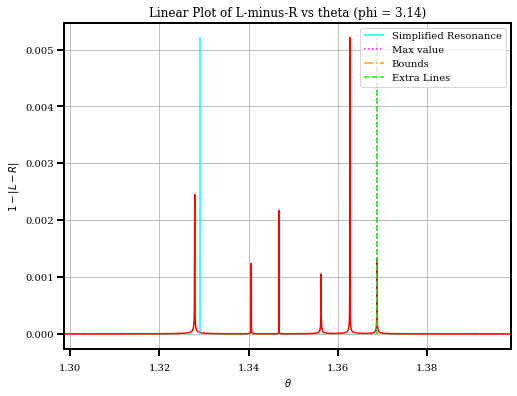

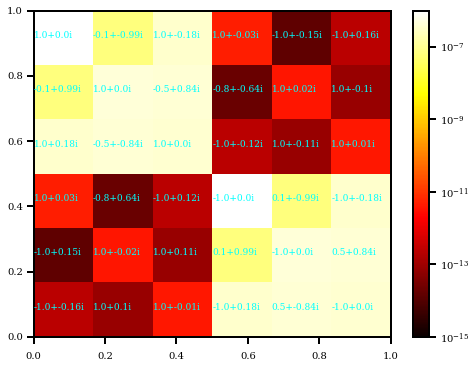

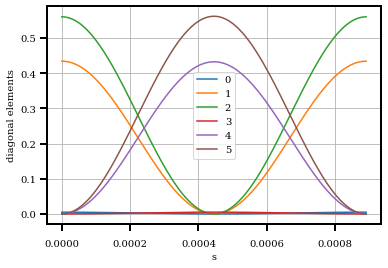

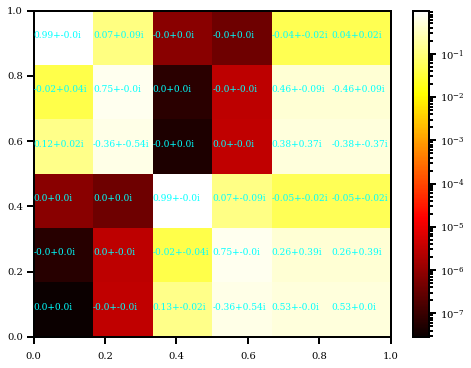

In [20]:
theta = thetas[1]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

resonant eigenvector =  [ 0.69118941+0.j         -0.02529665+0.05063332j  0.13637027+0.01976499j
  0.        +0.j          0.        +0.j          0.        +0.j        ]
Optimal theta in Range =  1.3686943579909632
[1.05470618e-07 2.75575136e-07 4.99999996e-01 4.99933958e-01
 2.78438729e-07 9.03559737e-08]


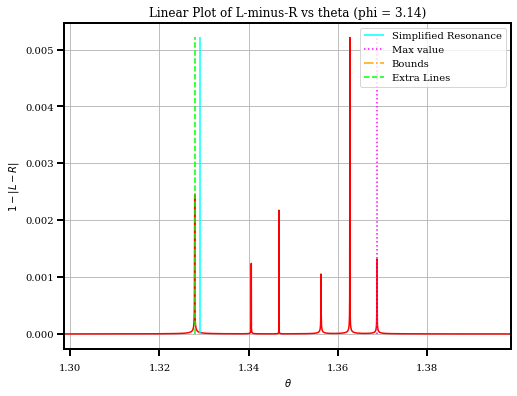

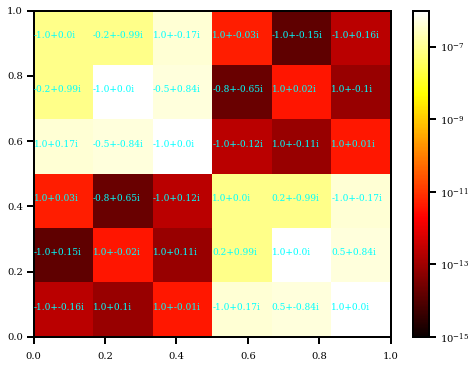

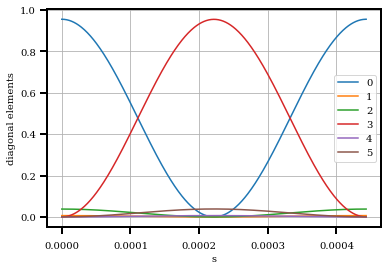

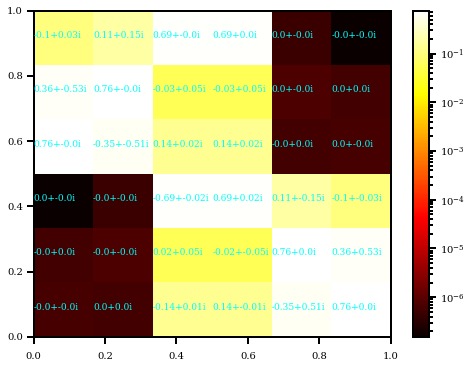

In [ ]:
theta = thetas[0]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

resonant eigenvector =  [ 0.69118941+0.j         -0.02529665+0.05063332j  0.13637027+0.01976499j
  0.        +0.j          0.        +0.j          0.        +0.j        ]
Optimal theta in Range =  1.3686943579909632
[1.05470618e-07 2.75575136e-07 4.99999996e-01 4.99933958e-01
 2.78438729e-07 9.03559737e-08]


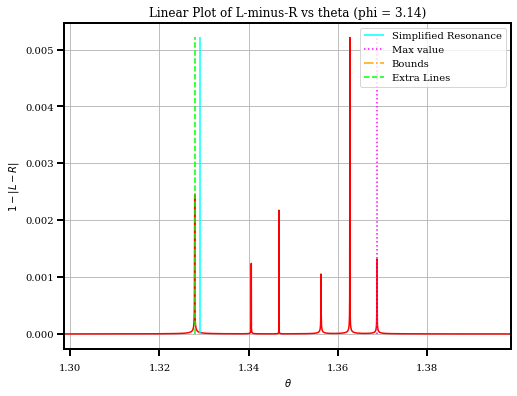

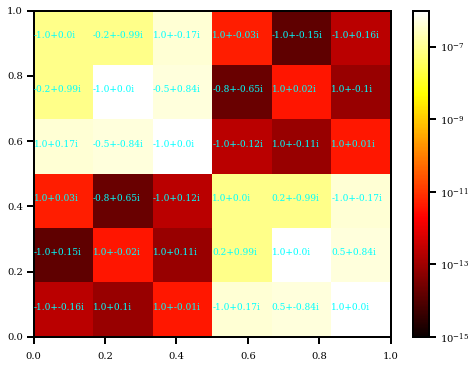

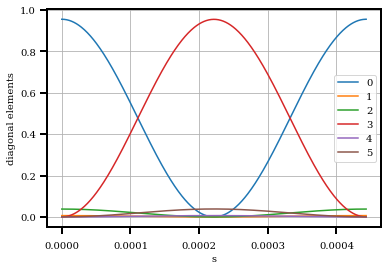

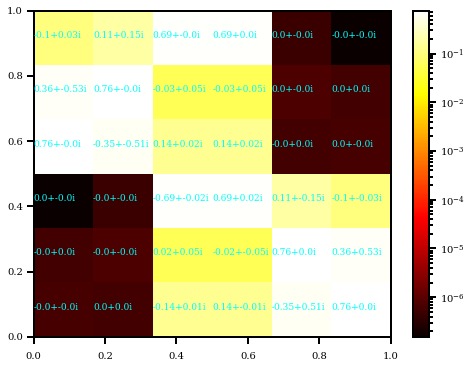

In [ ]:
theta = thetas[0]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

resonant eigenvector =  [ 0.69118941+0.j         -0.02529665+0.05063332j  0.13637027+0.01976499j
  0.        +0.j          0.        +0.j          0.        +0.j        ]
Optimal theta in Range =  1.3686943579909632
[1.05470618e-07 2.75575136e-07 4.99999996e-01 4.99933958e-01
 2.78438729e-07 9.03559737e-08]


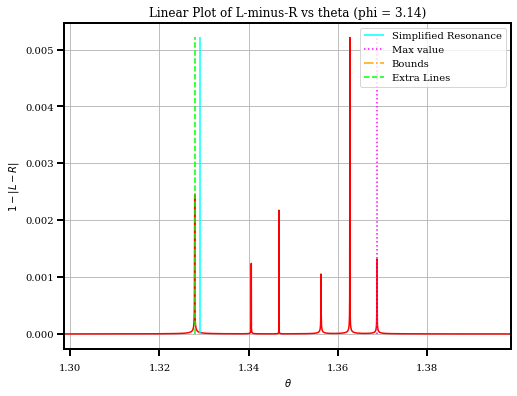

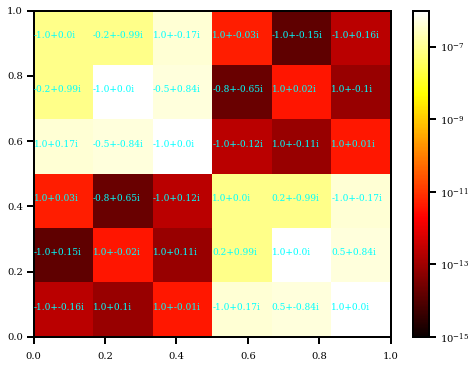

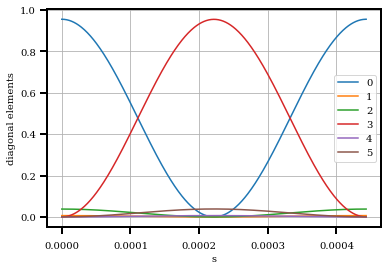

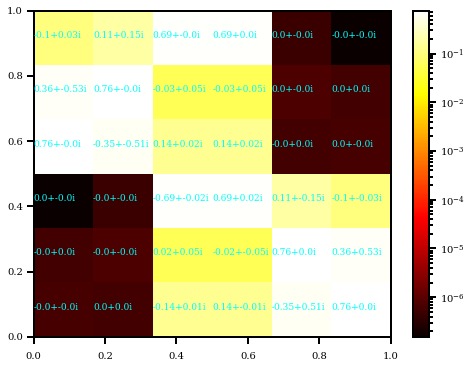

In [ ]:
theta = thetas[0]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

resonant eigenvector =  [ 0.69118941+0.j         -0.02529665+0.05063332j  0.13637027+0.01976499j
  0.        +0.j          0.        +0.j          0.        +0.j        ]
Optimal theta in Range =  1.3686943579909632
[1.05470618e-07 2.75575136e-07 4.99999996e-01 4.99933958e-01
 2.78438729e-07 9.03559737e-08]


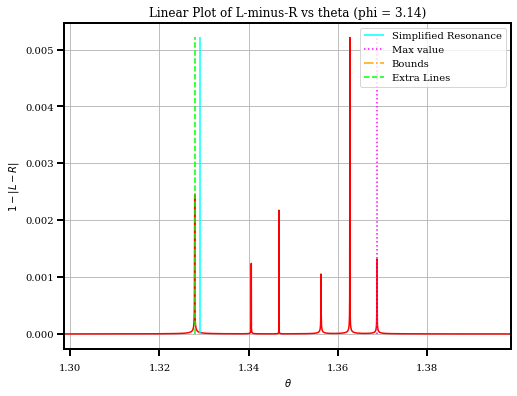

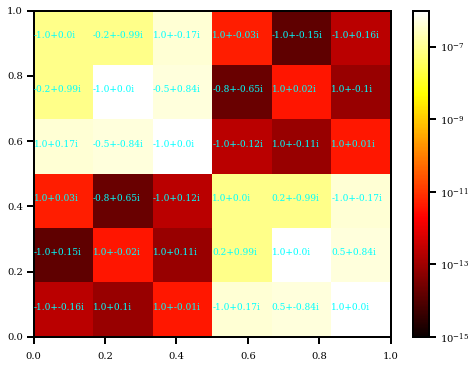

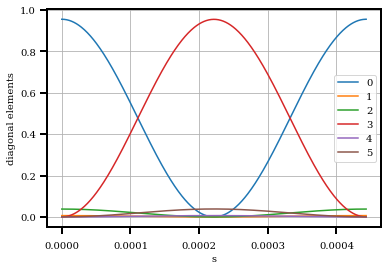

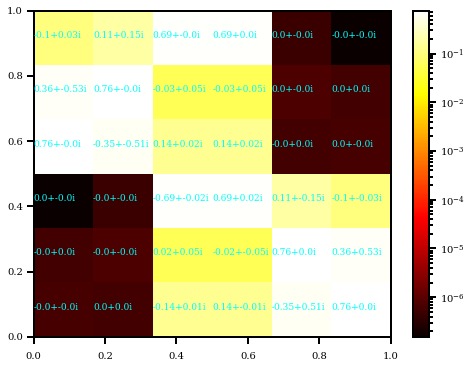

In [ ]:
theta = thetas[0]
H = SP.H(theta, np.pi)

ket = SP.leftMinusRight(theta = theta, phi= np.pi, min_eigenvec = True)[1]
ket[3:6] = 0
print('resonant eigenvector = ', str(ket))

P = np.outer(ket, matrix.dagger(ket))
P = P/np.linalg.norm(P)

SP.linearEigenvectorPlot(3000, value= 'lminusr', shift = -0.02 , zoom = 0.05, extra_lines=[theta])
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [0,1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)

f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
print(abs(f_to_e @ ket))

visualizer(e_to_f, traceless = False, text = 'full')

In [89]:
abs(np.array((-1,-1)))

array([1, 1])

In [ ]:
theta_max = 
theta_min = 
SP.minLeftMinusRight(phi = np.pi,  bounds = [(theta_max)])

In [230]:
theta_optimal, max_right = SP.minLeftMinusRight(phi=np.pi, method = 'Nelder-Mead', bounds = [(np.pi/4,3*np.pi/4)])
theta_optimal

1.3686943579909632

In [ ]:

def maxRightHandedArray(t, z, initvector, emu_data_loc, merger_data_loc, p_abs, phi_resolution = 100, theta_resolution = 100, xmin = 0, xmax = 201, ymin = 0, ymax = 201):
        max_right = np.zeros((xmax-xmin,ymax-ymin)) #x,y
        for x in range(xmin, xmax):
            for y in range(ymin, ymax):
                location = [x, y, z]
                emu_filename = emu_data_loc + "i{:03d}".format(location[0])+"_j{:03d}".format(location[1])+"_k{:03d}".format(location[2])+"/allData.h5"
                SP = SpinParams(t_sim = t, resonance_type = 'simplified', emu_file = emu_filename, merger_data_loc = merger_data_loc, location = location, p_abs=p_abs)
                max_right[x-xmin,y-ymin] = SP.maxRightHanded(initvector, phi_resolution = phi_resolution, theta_resolution = theta_resolution)[0]       

    #plots output of the above for a z slice
def rightHandedPlot(t, z, initvector, emu_data_loc, merger_data_loc, p_abs, phi_resolution = 100, theta_resolution = 100, xmin = 0, xmax = 201, ymin = 0, ymax = 201, savefig = False):
    max_right = maxRightHandedArray(t, z, initvector, emu_data_loc, merger_data_loc, p_abs, phi_resolution = phi_resolution, theta_resolution = theta_resolution, xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(np.mgrid[xmin:xmax+1:1,ymin:ymax+1:1][0,:,:],
                    np.mgrid[xmin:xmax+1:1,ymin:ymax+1:1][1,:,:], 
                    max_right, cmap = 'jet',
                    vmin = 0, vmax = 0.5)
    plt.colorbar()
    plt.title('Maximum Right-Handed Part of Largest Eigenvector Component')
    plt.xlabel('x index')
    plt.ylabel('y index')
    if savefig == True:
        plt.savefig('min_gradient.png')
    plt.show()

In [48]:
np.array([[1,2,3],[3]])

/tmp/ipykernel_1367123/580641248.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([[1,2,3],[3]])


array([list([1, 2, 3]), list([3])], dtype=object)

In [91]:
SP = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', density_matrix = P)
theta = SP.resonant_theta()
H = SP.H(theta+0.01,0)
eigenvec = dg.Diagonalizer(H).largest_ket_component(np.array([1,0,0,0,0,0]))[1]
np.linalg.norm(eigenvec[3:6])

3.1626420507878926e-06

Largest timescale = 1.278115336125396e-08 s
[-1.30045149e-01-8.51459323e-03j  1.78182953e-01-3.04948524e-01j
  9.26430242e-01+5.48984582e-17j  1.16487137e-05-1.02568883e-06j
 -7.51954653e-07-1.96129222e-06j  1.93264954e-07-9.83299972e-08j]


/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/basis.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.n_vector=np.array([1,np.cos(phi)*np.sin(theta),np.sin(phi)*np.sin(theta),np.cos(theta)])
/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/basis.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.x1=np.array([0,np.cos(phi)*np.cos(theta),np.sin(phi)*np.cos(theta),(-1)*np.sin(theta)])


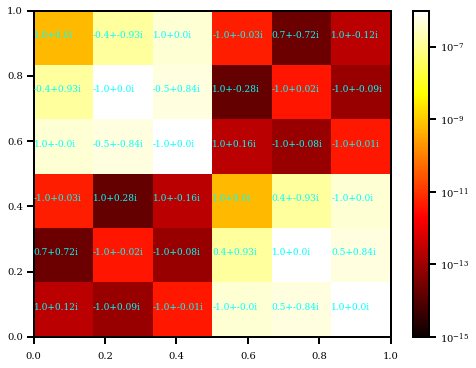

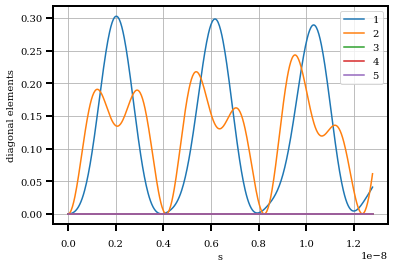

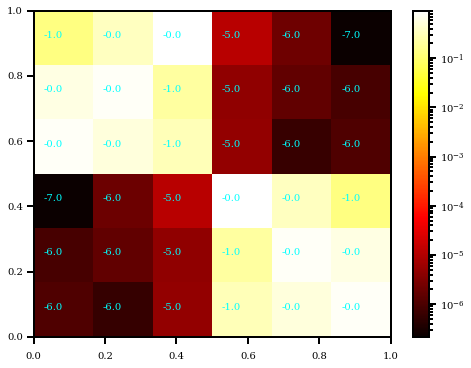

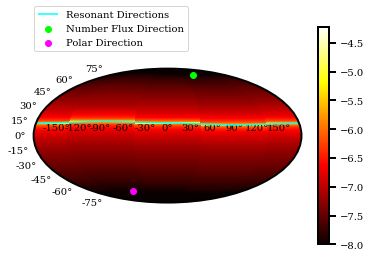

In [132]:
P = np.diag((1,0,0,0,0,0))

SP = sft.SpinParams(100, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', density_matrix = P)
H = SP.resonant_Hamiltonian()
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)
f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
ket = np.array([1,0,0,0,0,0])
print(f_to_e @ ket)
visualizer(e_to_f, traceless = False)
SP.eigenvectorPlot(np.array([1,0,0,0,0,0]), 500,5)
max=SP.maxRightHanded(np.array([1,0,0,0,0,0]), phi_resolutionolution=3)

In [102]:
max=SP.maxRightHanded(np.array([1,0,0,0,0,0]), phi_resolutionolution=3)

/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/basis.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.n_vector=np.array([1,np.cos(phi)*np.sin(theta),np.sin(phi)*np.sin(theta),np.cos(theta)])
/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/basis.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.x1=np.array([0,np.cos(phi)*np.cos(theta),np.sin(phi)*np.cos(theta),(-1)*np.sin(theta)])


TypeError: '<=' not supported between instances of 'OptimizeResult' and 'OptimizeResult'

Largest timescale = 0.00032070631634439797 s
[ 7.28335066e-01-4.74085996e-14j -6.85220333e-01+1.01603080e-03j
 -2.98780291e-04-7.41351844e-05j -6.51857813e-06+8.52325264e-08j
 -3.56639641e-08-8.82042740e-09j -7.39821498e-10+6.30243227e-13j]


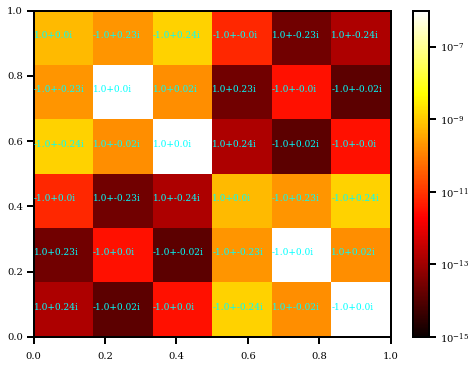

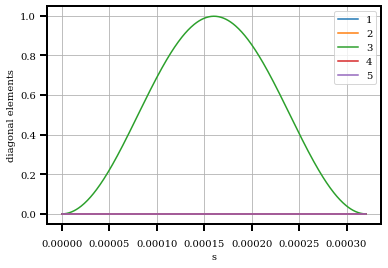

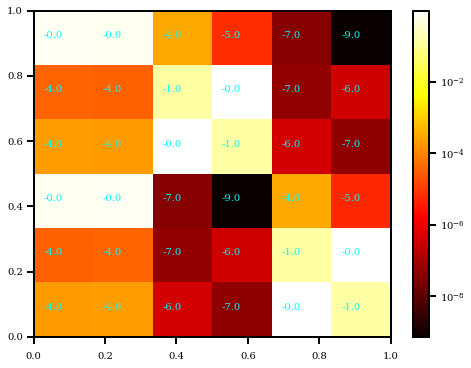

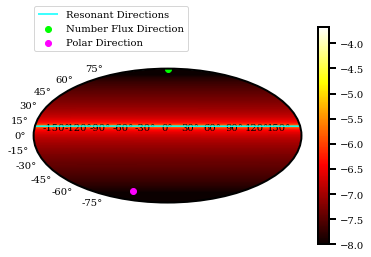

In [96]:
P = np.diag((1,0,0,0,0,0))

SP = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', density_matrix = P)
H = SP.resonant_Hamiltonian()
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)
f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
ket = np.array([1,0,0,0,0,0])
print(f_to_e @ ket)
visualizer(e_to_f, traceless = False)
SP.eigenvectorPlot(np.array([1,0,0,0,0,0]), 5000,5)


Largest timescale = 1.4232523986624954e-08 s
[-7.26108419e-02-5.44759079e-02j -1.42481161e-01+3.23453092e-02j
  9.85095397e-01-2.08986169e-18j  1.38845091e-05-4.12893611e-07j
  6.44021382e-08-6.79905754e-08j  8.69410878e-08+3.37954538e-08j]


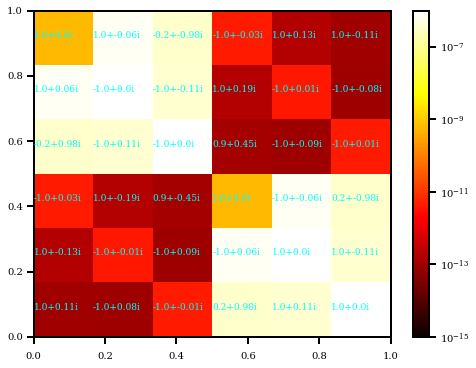

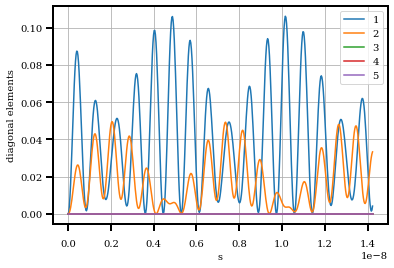

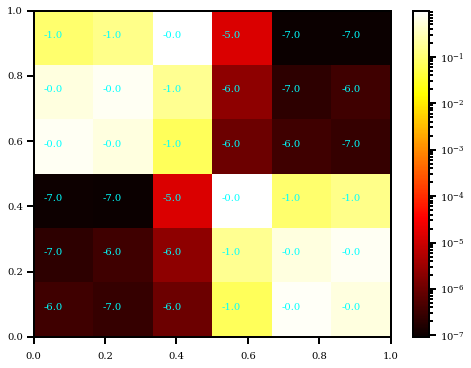

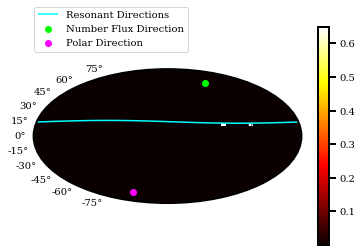

In [28]:
P = np.diag((1,0,0,0,0,0))

SP = sft.SpinParams(240, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', density_matrix = P)
H = SP.resonant_Hamiltonian()
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)
f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
ket = np.array([1,0,0,0,0,0])
print(f_to_e @ ket)
visualizer(e_to_f, traceless = False)
SP.eigenvectorPlot(np.array([1,0,0,0,0,0]), 50,50)


In [31]:
sft.rightHandedPlot(0, 99, np.array([1,0,0,0,0,0]), emu_data_loc, merger_data_filename, p_abs, phi_resolutionolution = 100, theta_resolution = 100, xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, savefig = False)


TypeError: 'numpy.int64' object is not iterable

Largest timescale = 0.00032070631634439797 s
[ 7.28335066e-01-4.74085996e-14j -6.85220333e-01+1.01603080e-03j
 -2.98780291e-04-7.41351844e-05j -6.51857813e-06+8.52325264e-08j
 -3.56639641e-08-8.82042740e-09j -7.39821498e-10+6.30243227e-13j]


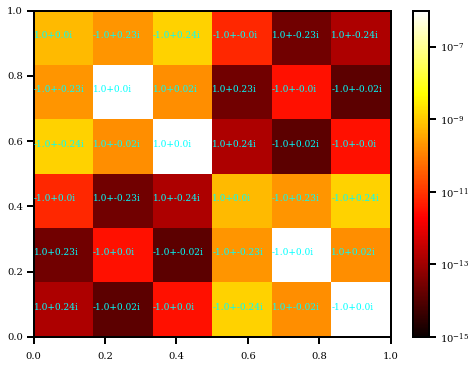

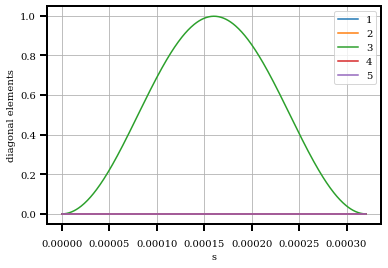

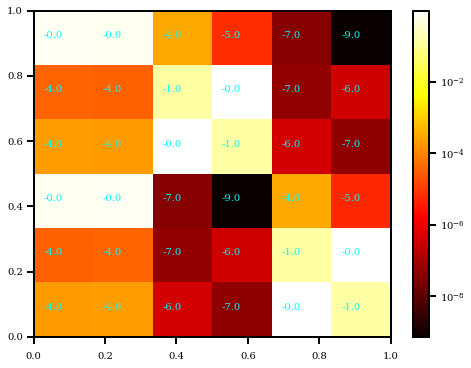

In [11]:
P = np.diag((1,0,0,0,0,0))
H = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', density_matrix = P).resonant_Hamiltonian()
visualizer(H, log=True,  text='arg', traceless = True, vmin=1E-15,vmax=1E-6, savefig=False)
dg.Diagonalizer(H).state_evolution_plotter(resolution=500, quantity = [1,2,3,4,5],
                                            ylim = None, init_array = P, savefig = False)
f_to_e = dg.Diagonalizer(H).f_to_e
e_to_f = matrix.dagger(f_to_e)
ket = np.array([1,0,0,0,0,0])
print(f_to_e @ ket)
visualizer(e_to_f, traceless = False)

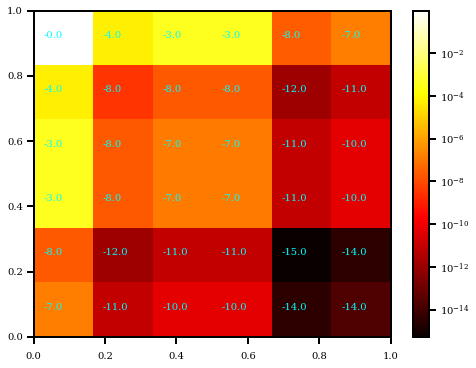

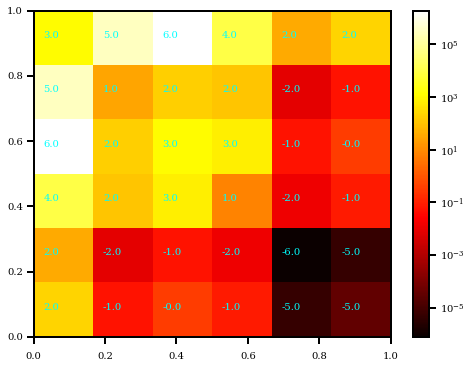

In [82]:
t = 100
visualizer(P_evol[t] , traceless =False)
visualizer(matrix.derivative(H, P_evol[t]), traceless = False)

In [116]:
H = np.array([[0,1],[1,0]])
P = np.diag((1,0))
P_evol = dg.Diagonalizer(H).state_evolution(10000, 'timescale', P)

Largest timescale = 2.0678338483020018e-15 s


None None
None None


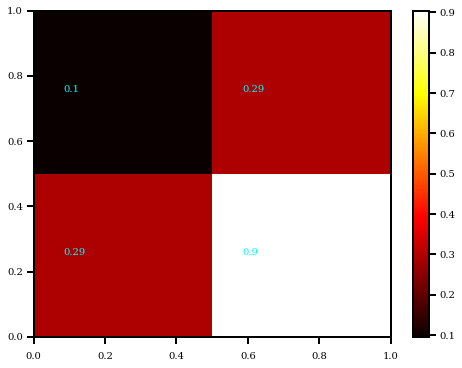

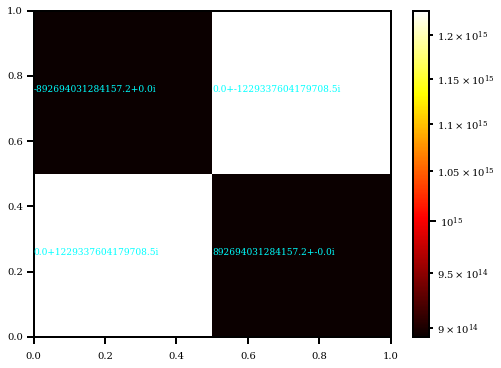

In [131]:
t=4000
visualizer(P_evol[t] , traceless =False, log = False)
visualizer(matrix.derivative(H, P_evol[t]), traceless = False, log = True, text = 'full')

None None


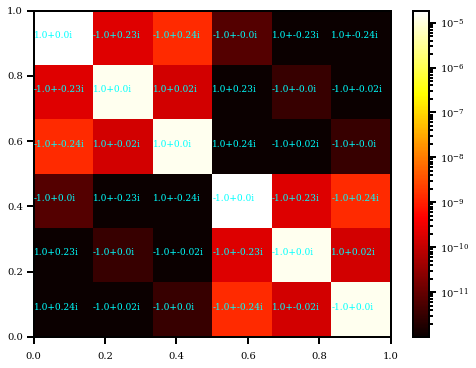

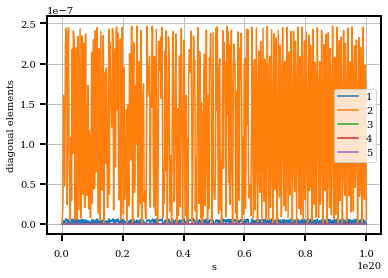

In [170]:
H_below= sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'full', density_matrix = P, gradient_filename = gradient_filename).H(np.pi/2,0)
visualizer(H_below,text='arg')
dg.Diagonalizer(H_below).state_evolution_plotter( t_lim = 1E20, resolution=500, quantity = [1,2,3,4,5])

None None


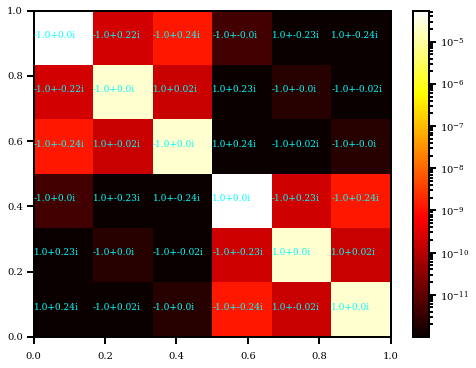

In [165]:
H_above= sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'full', density_matrix = P, gradient_filename = gradient_filename).H(np.pi/4,0)
visualizer(H_above, text = 'arg')

In [159]:
P = np.diag((1,0,0,0,0,0))
P_evol_a = dg.Diagonalizer(H_above).state_evolution(10000, 'timescale', P)
P_evol_b = dg.Diagonalizer(H_below).state_evolution(10000, 'timescale', P)



Largest timescale = 3.7009928204286626e-06 s


NameError: name 'H_below' is not defined

Largest timescale = 1.278115336125396e-08 s
None None


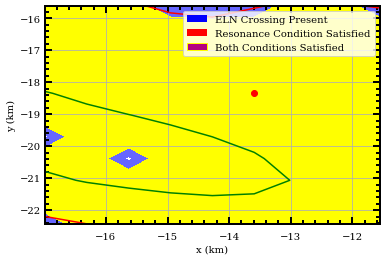

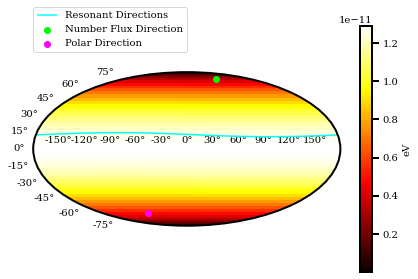

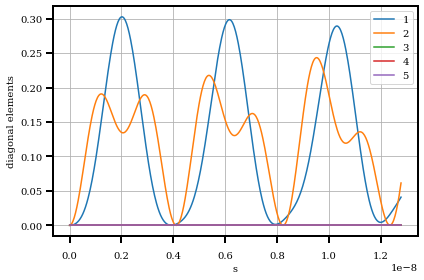

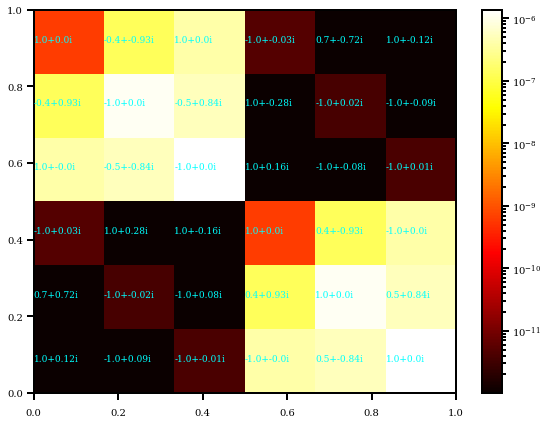

In [171]:
sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'simplified', p_abs=p_abs).pointPlots(100,diagonalizer_quantity =[1,2,3,4,5],traceless = True, text = 'arg', savefig=True)

None None
None None


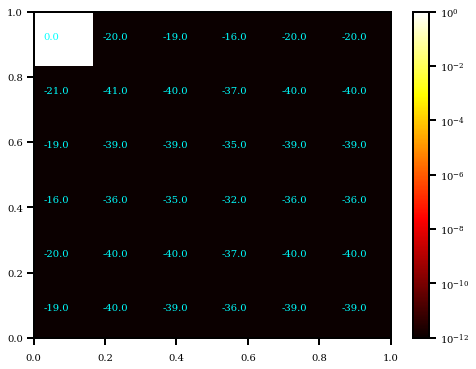

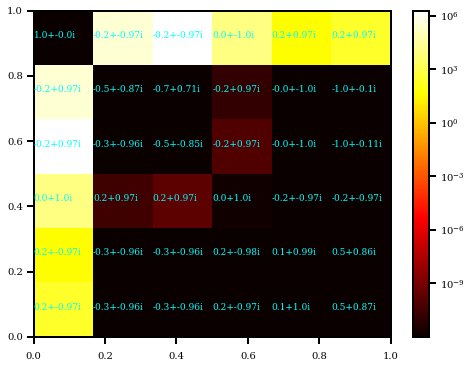

In [156]:
t = 0
visualizer(P_evol[t] , traceless =False)
visualizer(matrix.derivative(H, P_evol[t]), traceless = False, text  = 'arg')

None None


/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/matrix.py:67: RuntimeWarning: divide by zero encountered in log10
  ax.text(xcoord, ycoord, str(round(np.log10(np.abs(M[m,n])),0)), color='cyan', size=10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 6)

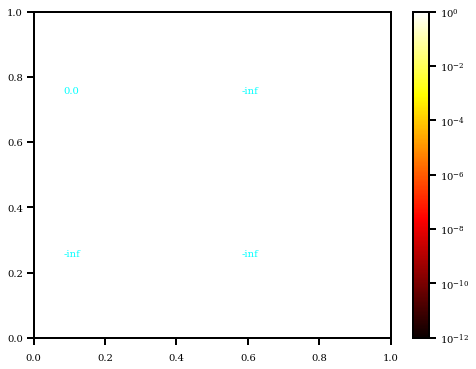

In [ ]:
P_evol = dg.Diagonalizer(H).state_evolution(10000, 'timescale', P)
t = 0
visualizer(P_evol[t] , traceless =False)
visualizer(matrix.derivative(H, P_evol[t]), traceless = False, text  = 'mag')

In [ ]:
matrix

minimum resonance magnitude =  5.674993519615539e-17
minimizing resonant phi =  0.9811580659860014
minimizing theta =  1.7220441610071433


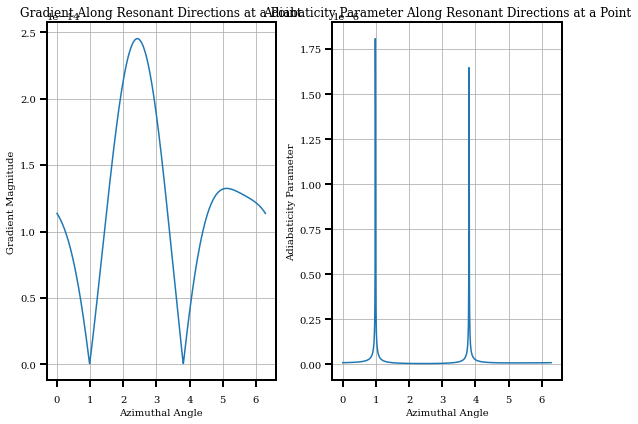

In [14]:
location=[77,74,98]
emu_filename = emu_data_loc + "i{:03d}".format(location[0])+"_j{:03d}".format(location[1])+"_k{:03d}".format(location[2])+"/allData.h5"

sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename=gradient_filename).azimuthalGradientsPlot(phi_resolutionolution = 1000)

In [8]:
grad = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename=gradient_filename).grad_H_L(1,1) 
H_LR = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename=gradient_filename).H_LR(1,1) 
H_L = sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename=gradient_filename).H_L(1,1) 


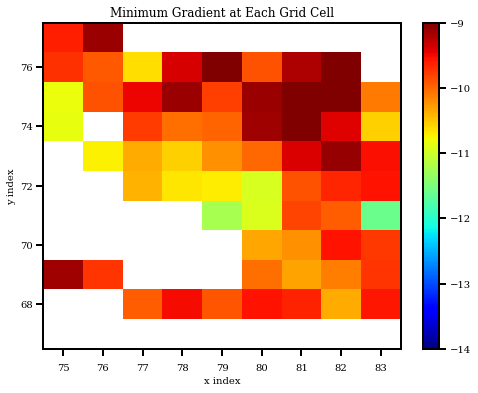

In [82]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, min_gradients=mingradients)

In [86]:
sft.Gradients(gradient_filename,merger_data_filename).limits[2,0]

97

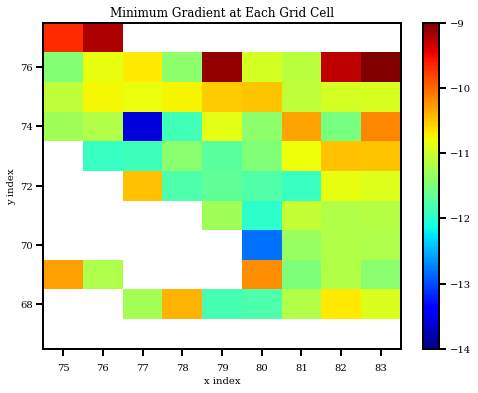

In [84]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, phi_resolutionolution = 100)

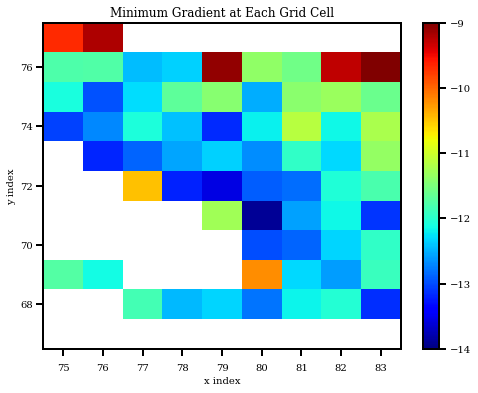

In [85]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, phi_resolutionolution = 1000)

/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip/spin_flip_tools.py:435: UserWarning: No contour levels were found within the data range.
  res_im = ax.contour(np.linspace(-np.pi, np.pi, phi_res),


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sin method

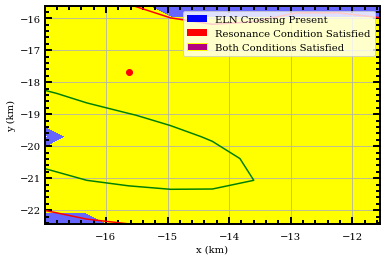

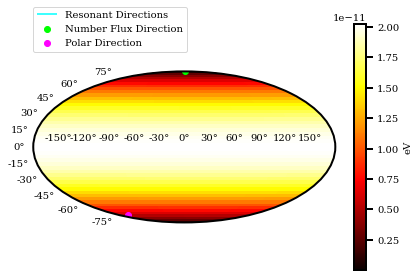

In [15]:
sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'full',  density_matrix=np.diag([1/2,0,0,1/2,0,0]), p_abs=p_abs).pointPlots(0,traceless = True, text = 'mag',savefig=True)

In [50]:
visualizer(sft.SpinParams(0, emu_filename,merger_data_filename,location, p_abs, resonance_type = 'full', density_matrix=np.diag([1/2,0,0,1/2,0,0])).resonant_Hamiltonian())

ValueError: f(a) and f(b) must have different signs

In [51]:
GM = gm.get_GM(6)
GM[1]
projection_H = gm.projection(sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'simplified', p_abs=p_abs).resHamiltonian(0))
projection_P = gm.projection(np.diag((1,0,0,0,0,0)))
projection_P

1.3909679927558272


array([0.5       +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.28867513+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.20412415+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.15811388+0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.12909944+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j])

In [45]:
np.diag(sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'simplified', p_abs=p_abs).resHamiltonian(0)
)

1.3909679927558272


array([ 1.99887726e-08+0.j,  4.17392733e-06+0.j,  4.17500215e-06+0.j,
        1.99887728e-08+0.j, -4.13689654e-06+0.j, -4.13582172e-06+0.j])

In [126]:
proj =gm.projection([[1,0,0],[0,0,0],[0,0,0]])
proj

array([0.5       +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.28867513+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])